In [ ]:
!sudo apt-get install -y fonts-nanum #글씨체 
!sudo fc-cache -fv #글씨체
!rm ~/.cache/matplotlib -rf #글씨체

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (38.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122532 files and dir

- 구글 드라이브 연동하기 

In [9]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 파일 업로드하기

In [10]:
from google.colab import files
uploaded=files.upload()

Saving laptopPrice.csv to laptopPrice.csv


(823, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null   

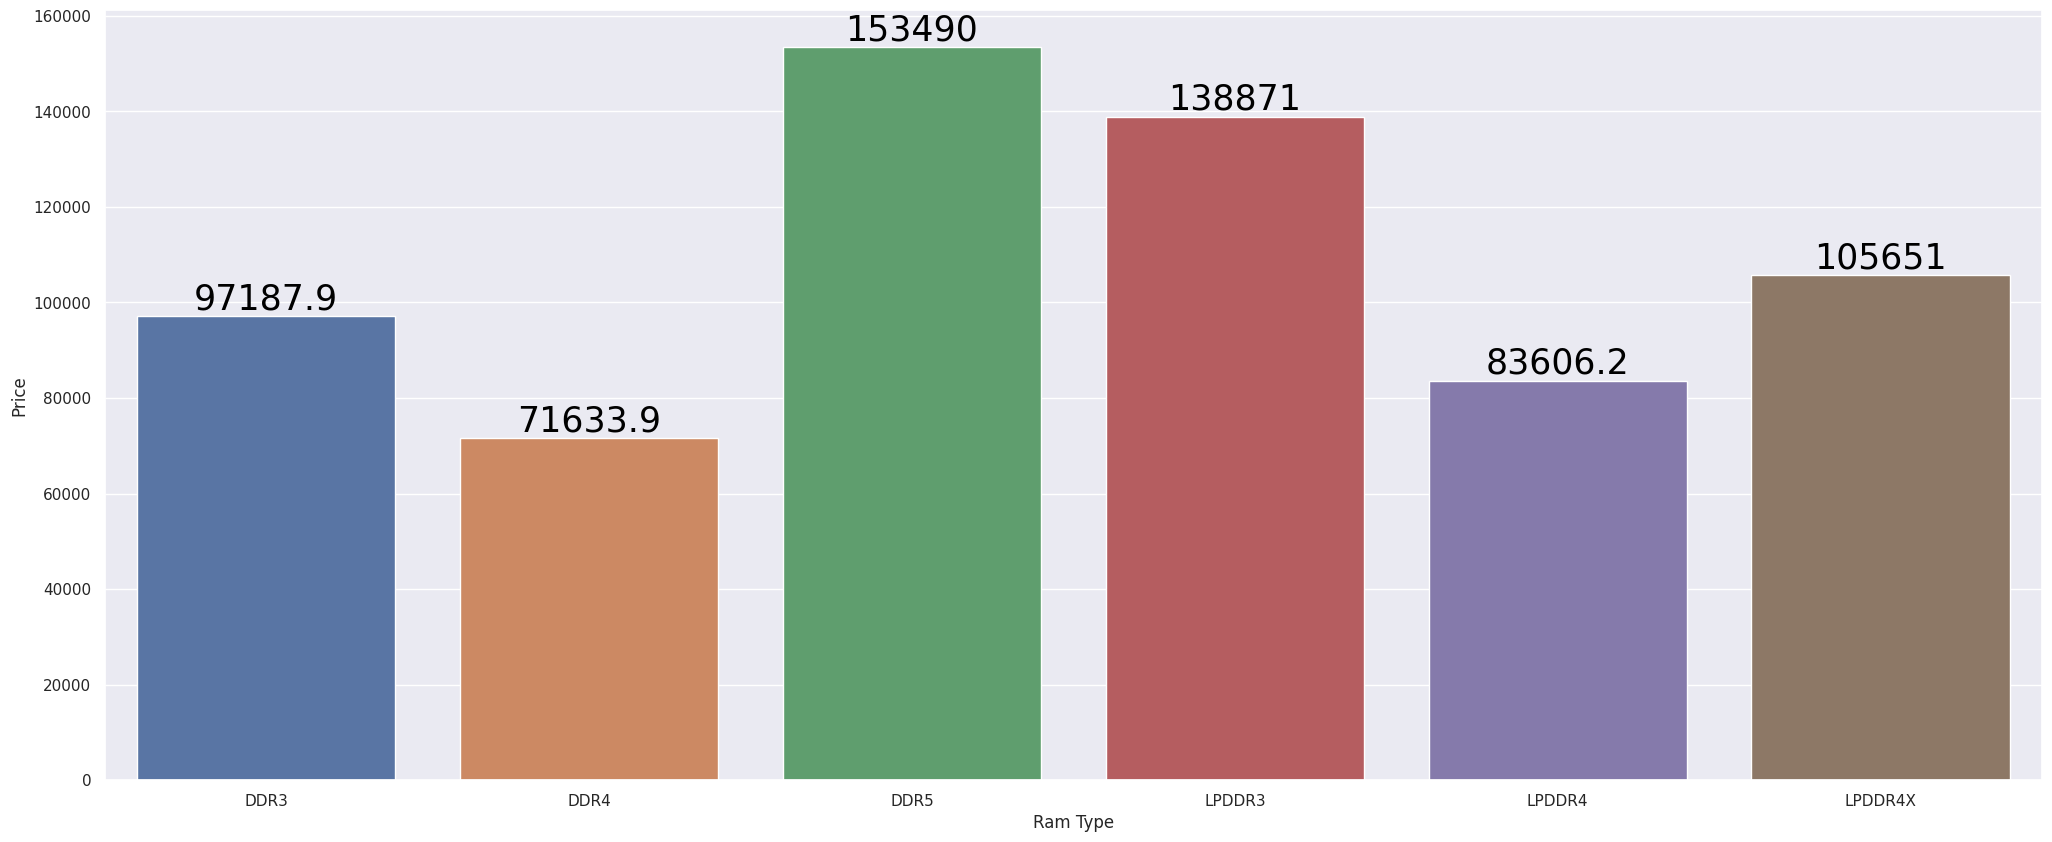

In [33]:
# CSV 파일 읽기, df에 저장 
df = pd.read_csv('/content/laptopPrice.csv')

# DataFrame의 형태(shape) 확인:(행의 수, 열의 수)
print(df.shape) 

# 결측값 확인(isna() 함수), 각 열의 결측값 개수를 계산(sum()함수):
df.isna().sum()

# 중복된 행 확인(duplicated() 함수),중복된 행의 개수를 계산(sum()함수)
df.duplicated().sum()

# 중복된 행 제거(drop_duplicates() 함수), 제거 후 다시 df에 저장 
df = df.drop_duplicates()

# DataFrame에 대한 정보 표시(info() 메서드)- DataFrame에 대한 요약 정보를 제공 각 열의 비어 있지 않은 값의 수와 열의 데이터 유형 등 
df.info()

# df에서 ram type,proce열만 추출하기,df에 저장
df=df.iloc[:,[5,15]]
df.info()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 
import seaborn as sns
sns.set()

f,ax=plt.subplots(1,figsize=(25,10))
Group_data = df.groupby('ram_type')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax)
for container in ax.containers:
    ax.bar_label(container,color='black',size=25)
    ax.set_xlabel("Ram Type") # x축 이름 지정 
    ax.set_ylabel("Price")    # y축 이름 지정 


In [ ]:
# 경고 메시지 무시하도록 설정
import warnings
warnings.filterwarnings('ignore')